# Import Necessary Modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import SGD

# Load the 'MNIST' Dataset & Examine it

In [2]:
# Load the MNIST dataset & split it into training and validation datasets
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# Some print statements to examine the dataset we have
print("Number of samples in our training data: " + str(len(x_train)))
print("Number of labels in our training data: " + str(len(y_train)))
print("Number of samples in our validation data: " + str(len(x_val)))
print("Number of labels in our validation data: " + str(len(y_val)))
print()
print("Dimensions of x_train: " + str(x_train.shape))
print("Dimensions of x_val: " + str(x_val.shape))

Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our validation data: 10000
Number of labels in our validation data: 10000

Dimensions of x_train: (60000, 28, 28)
Dimensions of x_val: (10000, 28, 28)


# Preprocessing Our Dataset

## Preprocessing our image datasets i.e x_train & x_val

In [3]:
# Add a fourth column that indicates number of channels of the images present within the dataset
x_train = x_train.reshape(60000, 28, 28, 1)
x_val = x_val.reshape(10000, 28, 28, 1)

# Change our image data type to float32 data type
x_train = x_train.astype('float32')
x_val = x_val.astype('float32')

# Normalize our data by changing the range from (0 to 255) to (0 to 1)
x_train /= 255
x_val /= 255

## Preprocessing our label datasets i.e y_train & y_val

In [4]:
# Since we are dealing with categorical data, we need to 'One-Hot' encode our labels
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)

# Build a Model

## Create the Model

In [5]:
# Initalize the model using Sequential class from Keras
model = Sequential()
# Add first convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 input_shape=(28, 28, 1), padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add 2nd convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding="same"))
# Add a pooling layer which will downsample our data
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a flatten layer which will aid in flattening the input
model.add(Flatten())
# Add a dense/FC layer
model.add(Dense(units=256, activation='relu'))
# Add a droput layer which will aid in regularization
model.add(Dropout(0.5))
# Add a dense/FC layer
model.add(Dense(units=10, activation='softmax'))
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])
# Print a summary of our model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               803072    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0

## Define Callbacks

In [6]:
# Define a callback for saving only the best model during the training
checkpoint = ModelCheckpoint(filepath="./Trained Models/mnist_handwritten_digit_classifier.h5",
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

# Define a callback to stop training when validation accuracy has stopped increasing
earlystop = EarlyStopping(monitor='val_accuracy',
                          mode='max',
                          patience=3,
                          restore_best_weights=True,
                          verbose=1)

# Put our callbacks into a list
callbacks = [earlystop, checkpoint]

# Train the Model

In [7]:
# Train our model and store the training results in a variable
model_train_result = model.fit(x=x_train,
                               y=y_train,
                               batch_size=32,
                               epochs=100,
                               callbacks=callbacks,
                               verbose=1,
                               validation_data=(x_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 12s 5ms/step - loss: 1.1092 - accuracy: 0.6487 - val_loss: 0.1686 - val_accuracy: 0.9496

Epoch 00001: val_accuracy improved from -inf to 0.94960, saving model to ./Trained Models\mnist_handwritten_digit_classifier.h5
Epoch 2/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2262 - accuracy: 0.9312 - val_loss: 0.1055 - val_accuracy: 0.9668

Epoch 00002: val_accuracy improved from 0.94960 to 0.96680, saving model to ./Trained Models\mnist_handwritten_digit_classifier.h5
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1589 - accuracy: 0.9516 - val_loss: 0.0815 - val_accuracy: 0.9724

Epoch 00003: val_accuracy improved from 0.96680 to 0.97240, saving model to ./Trained Models\mnist_handwritten_digit_classifier.h5
Epoch 4/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1262 - accuracy: 0.9619 - val_loss: 0.0665 - val_accuracy: 0.9791

Epoch 00004: val_accuracy

# Evaluate Model's Performance

## Loss & Accuracy Charts

### Loss Chart

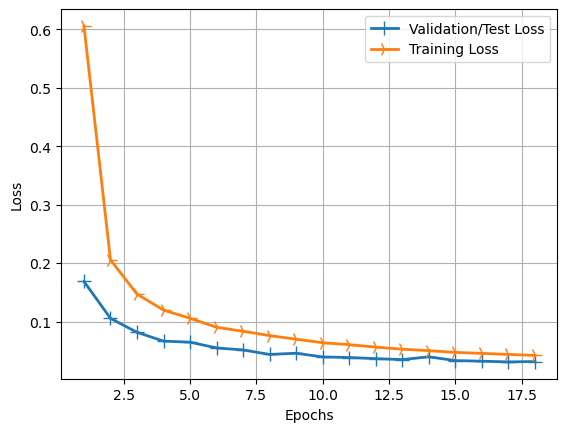

In [8]:
history_dict = model_train_result.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

### Accuracy chart

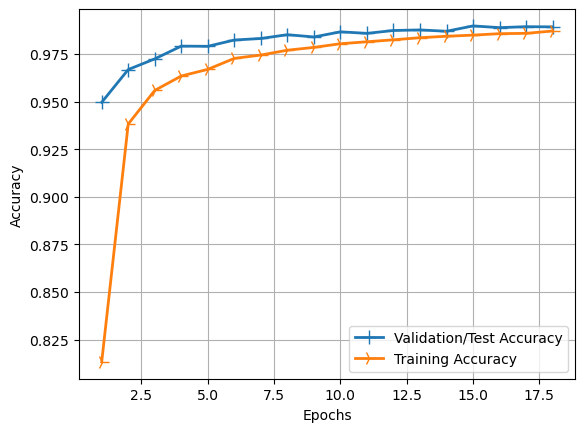

In [9]:
history_dict = model_train_result.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Classification Report for Validation Dataset

In [10]:
# Undo the one-hot encoding for y_val
y_val = np.argmax(y_val, axis=1)

# Get model's predictions for each image in validation dataset
val_pred = model.predict(x_val, batch_size=32)

# Undo the one-hot encoding for val_pred
val_pred = np.argmax(val_pred, axis=1)

# Get class names
class_names = np.array(['0', '1', '2',
                        '3', '4', '5', '6', '7', '8', '9'])

# Get the classification report generated for validation dataset
print(classification_report(y_true=y_val,
                            y_pred=val_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      1.00      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Confusion Matrix for Validation Dataset

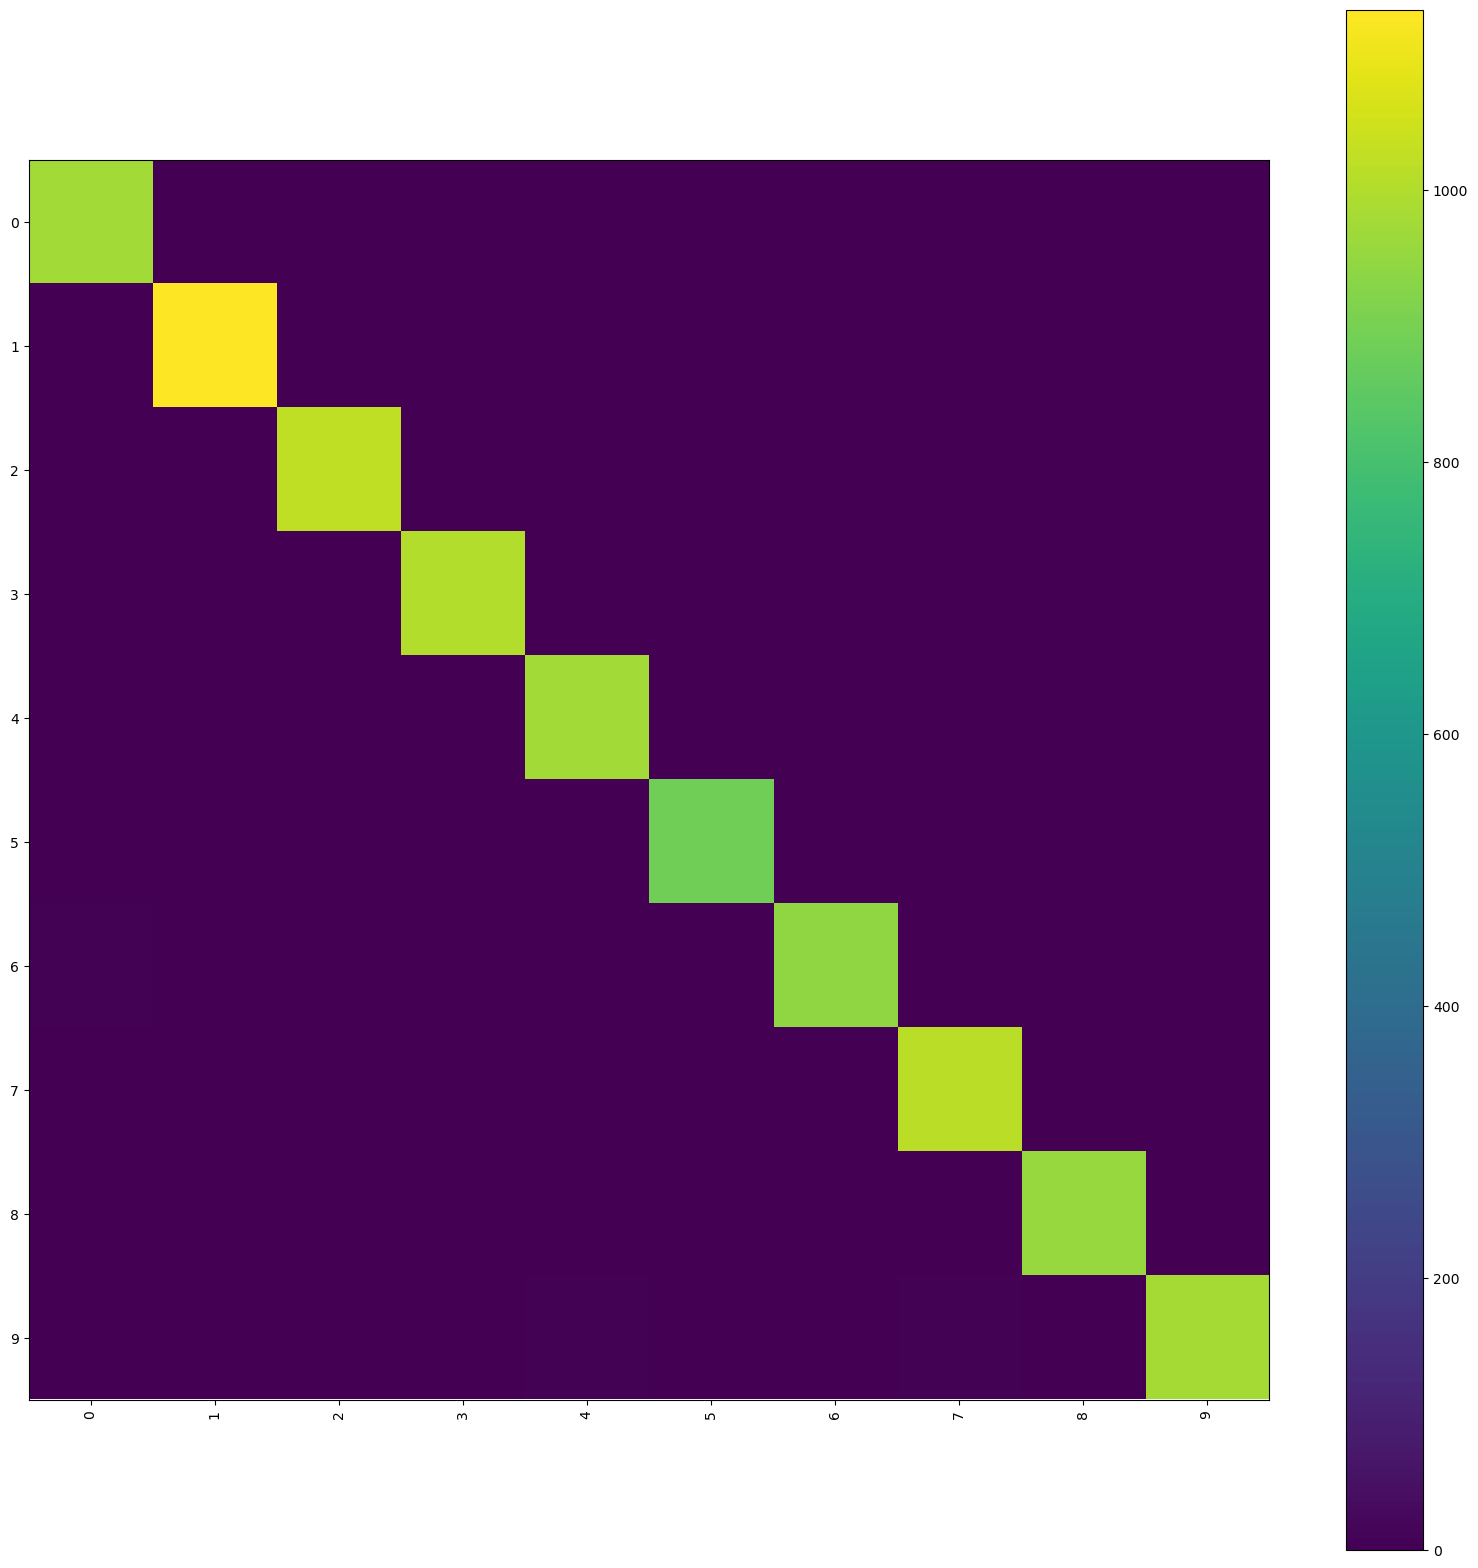

In [11]:
# Generate the confusion matrix for validation dataset
cnf_matrix = confusion_matrix(y_true=y_val, y_pred=val_pred)

# Display the confusion matrix
plt.figure(figsize=(20, 20))
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(class_names))
_ = plt.xticks(tick_marks, class_names, rotation=90)
_ = plt.yticks(tick_marks, class_names)
plt.show()